In [ ]:
"""LCR meter only"""
from Functions_A import *
from Functions_B import *
import datetime
import matplotlib.pyplot as plt
start_runtime = time.time()

# connect to the LCR meter
ser_lcr = DeviceConnect('/dev//cu.usbserial-A94IP9Y2')  # LCR Meter

freq = Frequencies(1*10, 100*1000, 10) # start, stop, number of points in-between (log spaced) 
# 10 Hz - 100 kHz (2 - 5 in log space) 

# mainReadings = ["R", "C", "L", "Z"]   (Ohm, H, C, Ohm) 
# minorReadings = ["X", "D", "Q", "THR" (θ), "ESR"] (Ohm, None, None, deg, Ohm) 
mainReadings = ['R'] # can add multiple readings
minorReadings = ['X'] # can add multiple readings
voltage = 1 # AC voltage (V)
biasVoltage = 0 # DC bias voltage. set to None if no bias is needed. 
numMeasurements = 3 

#chamber v7.3 dimensions
height = 34 # mm
ir = 4.1 # mm
area = np.pi*ir**2 # mm^2     
area = round(area, 2)
thickness = height  # mm
timestamp = time.strftime("%H%M")

try:    
    material = input('Material? ')
    params = [material, mainReadings, minorReadings]
    info = f'{area}, Area (mm^2), {thickness}, Thickness (mm), {voltage}, V, n={numMeasurements}'
    dataFrame = Experiment(ser_lcr, freq, mainReadings, minorReadings, voltage, biasVoltage, numMeasurements)

    DataExport(params, dataFrame, info, timestamp)

except Exception as e:
    print(f'Test Aborted: {e}')
    if 'dataFrame' in locals():
        info = f'{area}, mm^2, {thickness}, mm, {voltage}, V, n={numMeasurements}'
        DataExport(params, dataFrame, info, timestamp)
        print("!!! Partial data saved.")

finally:
    DeviceDisconnect(ser_lcr)

end_runtime = time.time()
print(f"Total runtime = {round(end_runtime - start_runtime, 2)} seconds")

# LCRCommander(ser_lcr, 'SYST:REM') # remote mode
# LCRCommander(ser_lcr, 'SYST:LOC') # local mode

   Frequency       R Avg.    R Std.    R-X Avg.  R-X Std.
0         10  1326.480000  0.268701 -164.878333  0.004714
1         28   374.963333  1.193352  -64.232333  0.014044
2         77   116.208333  0.129636  -26.021033  0.002027
3        215    34.876333  0.033564  -10.535500  0.004101
4        599    10.207500  0.002828   -4.304590  0.000156
5       1668     5.773087  3.133977   -2.619190  1.190789
6       4642     2.498507  0.748334   -1.092563  0.484013
7      12915     1.722997  0.174453   -0.490264  0.184099
8      35938     1.510493  0.063107   -0.272358  0.062010
9     100000     1.414890  0.036106   -0.223623  0.003525
Test completed


Total runtime = 51.6 seconds


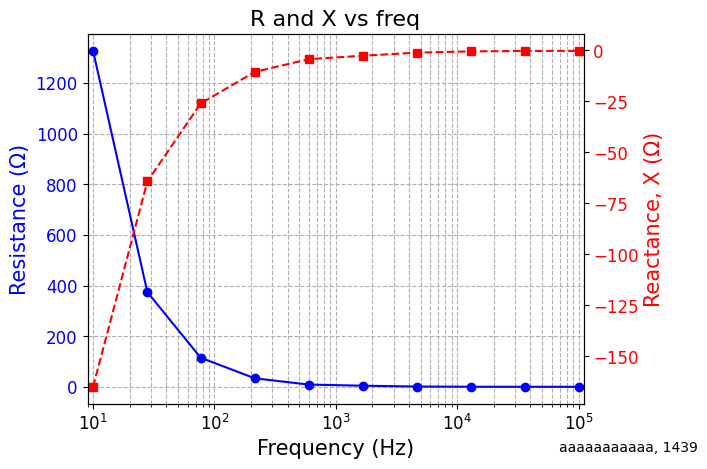

In [14]:
fig, ax1 = plt.subplots()

# Left Y-axis (Major param)
ax1.errorbar(
    dataFrame['Frequency'], dataFrame['R Avg.'], yerr=dataFrame['R Std.'],
    fmt='o-', color='blue')
ax1.set_xlabel('Frequency (Hz)',fontsize=15)
ax1.set_ylabel('Resistance (Ω)', color='blue',fontsize=15)
ax1.set_xscale('log')
ax1.set_xlim(freq[0]*0.9, freq[-1]*1.1)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelcolor='blue',labelsize=12)
ax1.text(0.95, -0.13, f'{material}, {timestamp}',
         transform=ax1.transAxes, fontsize=10)

# Right y-axis (Minor param)
ax2 = ax1.twinx()
ax2.errorbar(
    dataFrame['Frequency'], dataFrame['R-X Avg.'], yerr=dataFrame['R-X Std.'],
    fmt='s--', color='red')
ax2.set_ylabel('Reactance, X (Ω)', color='red',fontsize=15)
ax2.tick_params(axis='y', labelcolor='red',labelsize=12)

# 
ax1.grid(True, which='both', ls='--')
plt.title('R and X vs freq', fontsize=16)
plt.show()